In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_score,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.utils import class_weight

from keras.models import Model
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Dense, Dropout,LSTM, Activation,GRU,AveragePooling1D ,BatchNormalization, Reshape,Conv1D, MaxPooling1D,GlobalMaxPooling1D,Embedding

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.tuners import Hyperband
from kerastuner import HyperParameters

In [3]:
device_info_dataframe=pd.read_csv("device_info.csv")
device_info_dataframe

,DeviceID,DeviceName
0,1,Danmini_Doorbell
1,2,Ecobee_Thermostat
2,3,Ennio_Doorbell
3,4,Philips_B120N10_Baby_Monitor
4,5,Provision_PT_737E_Security_Camera
5,6,Provision_PT_838_Security_Camera
6,7,Samsung_SNH_1011_N_Webcam
7,8,SimpleHome_XCS7_1002_WHT_Security_Camera
8,9,SimpleHome_XCS7_1003_WHT_Security_Camera


In [ ]:
features_data=pd.read_csv("features.csv")
features_data

,Feature Name,Feature Description
0,MI_dir_L5_weight,MI dir Lambda 5 weight
1,MI_dir_L5_mean,MI dir Lambda 5 mean
2,MI_dir_L5_variance,MI dir Lambda 5 variance
3,MI_dir_L3_weight,MI dir Lambda 3 weight
4,MI_dir_L3_mean,MI dir Lambda 3 mean
...,...,...
110,HpHp_L0.01_std,traffic going from this packet's host+port (IP...
111,HpHp_L0.01_magnitude,traffic going from this packet's host+port (IP...
112,HpHp_L0.01_radius,traffic going from this packet's host+port (IP...
113,HpHp_L0.01_covariance,traffic going from this packet's host+port (IP...


In [ ]:
Data_summary=pd.read_csv("data_summary.csv")
Data_summary

,File Name,Data Count,Feature Count
0,1.benign.csv,49548,115
1,1.gafgyt.combo.csv,59718,115
2,1.gafgyt.junk.csv,29068,115
3,1.gafgyt.scan.csv,29849,115
4,1.gafgyt.tcp.csv,92141,115
...,...,...,...
84,9.mirai.ack.csv,107187,115
85,9.mirai.scan.csv,43674,115
86,9.mirai.syn.csv,122479,115
87,9.mirai.udp.csv,157084,115


In [7]:
benign_df = pd.read_csv('1.benign.csv')
m_a_df = pd.read_csv('1.mirai.ack.csv')
m_sc_df = pd.read_csv('1.mirai.scan.csv')
m_sy_df = pd.read_csv('1.mirai.syn.csv')
m_u_df = pd.read_csv('1.mirai.udp.csv')
m_u_p_df = pd.read_csv('1.mirai.udpplain.csv')
g_c_df = pd.read_csv('1.gafgyt.combo.csv')
g_j_df = pd.read_csv('1.gafgyt.junk.csv')
g_s_df = pd.read_csv('1.gafgyt.scan.csv')
g_t_df = pd.read_csv('1.gafgyt.tcp.csv')
g_u_df = pd.read_csv('1.gafgyt.udp.csv')
benign_df1 = pd.read_csv('2.benign.csv')
m_a_df1 = pd.read_csv('2.mirai.ack.csv')
m_sc_df1 = pd.read_csv('2.mirai.scan.csv')
m_sy_df1 = pd.read_csv('2.mirai.syn.csv')
m_u_df1 = pd.read_csv('2.mirai.udp.csv')
m_u_p_df1 = pd.read_csv('2.mirai.udpplain.csv')
g_c_df1 = pd.read_csv('2.gafgyt.combo.csv')
g_j_df1 = pd.read_csv('2.gafgyt.junk.csv')
g_s_df1 = pd.read_csv('2.gafgyt.scan.csv')
g_t_df1 = pd.read_csv('2.gafgyt.tcp.csv')
g_u_df1 = pd.read_csv('2.gafgyt.udp.csv')

In [8]:
benign_df['Attack_Class'] = 'benign     '
m_u_df['Attack_Class']    = 'mirai_udp'
m_a_df['Attack_Class']    = 'mirai_ack'
m_sc_df['Attack_Class']   = 'mirai_scan'
m_sy_df['Attack_Class']   = 'mirai_syn'
m_u_p_df['Attack_Class']  = 'mirai_udpplain'
g_c_df['Attack_Class']    = 'gafgyt_combo'
g_j_df['Attack_Class']    = 'gafgyt_junk'
g_s_df['Attack_Class']    = 'gafgyt_scan'
g_t_df['Attack_Class']    = 'gafgyt_tcp'
g_u_df['Attack_Class']    = 'gafgyt_udp'
benign_df1['Attack_Class'] = 'benign     '
m_u_df1['Attack_Class']    = 'mirai_udp'
m_a_df1['Attack_Class']    = 'mirai_ack'
m_sc_df1['Attack_Class']   = 'mirai_scan'
m_sy_df1['Attack_Class']   = 'mirai_syn'
m_u_p_df1['Attack_Class']  = 'mirai_udpplain'
g_c_df1['Attack_Class']    = 'gafgyt_combo'
g_j_df1['Attack_Class']    = 'gafgyt_junk'
g_s_df1['Attack_Class']    = 'gafgyt_scan'
g_t_df1['Attack_Class']    = 'gafgyt_tcp'
g_u_df1['Attack_Class']    = 'gafgyt_udp'

In [9]:
df = pd.concat([benign_df,
                m_u_df, m_a_df, m_sc_df,m_sy_df, m_u_p_df,
                g_c_df,g_j_df, g_s_df, g_t_df,g_u_df,
                benign_df1,m_u_df1, m_a_df1, m_sc_df1,m_sy_df1, m_u_p_df1,
                g_c_df1,g_j_df1, g_s_df1, g_t_df1,g_u_df1],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack_Class
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign


In [ ]:
df.columns

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight',
       'HpHp_L0.01_mean', 'HpHp_L0.01_std', 'HpHp_L0.01_magnitude',
       'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc',
       'Attack_Class'],
      dtype='object', length=116)

In [ ]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,...,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06
mean,9.624249e+01,2.052305e+02,1.843373e+04,1.532890e+02,2.054967e+02,2.049003e+04,4.409556e+02,2.059617e+02,2.205870e+04,4.156145e+03,...,1.661179e+02,-1.204834e+01,-5.977208e-04,1.079786e+03,2.059568e+02,8.458999e-01,2.085748e+02,2.601214e+02,-1.209806e+01,-4.992637e-04
std,6.614292e+01,1.752707e+02,2.445885e+04,1.047999e+02,1.694320e+02,2.543059e+04,3.010989e+02,1.649477e+02,2.616546e+04,2.839076e+03,...,3.616173e+03,5.545478e+02,1.843718e-02,4.701589e+03,2.217342e+02,1.196102e+01,2.215277e+02,4.892830e+03,9.957348e+02,1.901132e-02
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-4.005854e+04,-1.010724e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-3.946335e+04,-6.909109e-01
25%,5.651449e+00,6.000000e+01,9.549694e-12,9.922579e+00,6.000003e+01,7.703394e-07,3.388566e+01,6.000441e+01,2.994025e-02,6.591560e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.119862e+02,7.405775e+01,3.912630e+01,1.883428e+02,7.407237e+01,4.195164e+01,5.938914e+02,7.417800e+01,4.477901e+01,5.772012e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.400000e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.493385e+02,3.696621e+02,4.401520e+04,2.360834e+02,3.788219e+02,4.862206e+04,6.655166e+02,3.882432e+02,5.171356e+04,6.418587e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.540000e+02,0.000000e+00,5.540000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,4.380028e+02,1.108155e+03,2.721017e+05,5.058053e+02,1.090333e+03,2.693159e+05,1.185250e+03,9.404513e+02,2.416279e+05,8.912649e+03,...,4.340505e+05,6.036894e+04,9.560988e-01,3.000666e+04,9.090000e+02,3.216536e+02,1.278265e+03,4.793690e+05,1.365841e+05,1.531981e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854174 entries, 0 to 1854173
Columns: 116 entries, MI_dir_L5_weight to Attack_Class
dtypes: float64(115), object(1)
memory usage: 1.6+ GB


In [ ]:
df.shape

(1854174, 116)

## **Data Analysis**

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px

import pandas as pd
import plotly.express as px

# Concatenate all datasets
df = pd.concat([benign_df, m_u_df, m_a_df, m_sc_df, m_sy_df, m_u_p_df,
                g_c_df, g_j_df, g_s_df, g_t_df, g_u_df,
                benign_df1, m_u_df1, m_a_df1, m_sc_df1, m_sy_df1, m_u_p_df1,
                g_c_df1, g_j_df1, g_s_df1, g_t_df1, g_u_df1], axis=0, ignore_index=True)

# Add a new column for the general class group (e.g., Benign, Mirai, Gafgyt)
df['General_Class'] = df['Attack_Class'].apply(lambda x: 'Benign' if 'benign' in x else ('Mirai' if 'mirai' in x else 'Gafgyt'))

# Calculate the total count for each general class
total_count = df['General_Class'].value_counts(normalize=True) * 100

# Create a summary DataFrame for percentages of General_Class
general_class_summary = df['General_Class'].value_counts().reset_index()
general_class_summary.columns = ['General_Class', 'Count']
general_class_summary['Percentage'] = (general_class_summary['Count'] / general_class_summary['Count'].sum()) * 100

# Calculate the count of each attack class
attack_class_count = df.groupby(['General_Class', 'Attack_Class'])['Attack_Class'].count().reset_index(name='Count')

# Merge the general class percentages with the attack class counts
attack_class_count = attack_class_count.merge(general_class_summary[['General_Class', 'Percentage']], on='General_Class')

# Update the labels to show the percentage for the General_Class and the count for the Attack_Class
attack_class_count['General_Class'] = attack_class_count['General_Class'] + ' (' + attack_class_count['Percentage'].round(2).astype(str) + '%)'
attack_class_count['Attack_Class'] = attack_class_count['Attack_Class'] + ' (' + attack_class_count['Count'].astype(str) + ')'

# Sunburst plot for Attack_Class and General_Class distribution
fig = px.sunburst(attack_class_count,
                  path=['General_Class', 'Attack_Class'],
                  values='Count',
                  title='Sunburst of Attack Classes and General Categories',
                  color='General_Class',
                  width=700, height=700)

# Show the plot
fig.show()




In [ ]:
df.isnull().sum()   # Identifying Missing Values

,0
MI_dir_L5_weight,0
MI_dir_L5_mean,0
MI_dir_L5_variance,0
MI_dir_L3_weight,0
MI_dir_L3_mean,0
...,...
HpHp_L0.01_magnitude,0
HpHp_L0.01_radius,0
HpHp_L0.01_covariance,0
HpHp_L0.01_pcc,0


In [ ]:
df.duplicated().sum()  # Identifying Duplicates values

322367

In [ ]:
df.groupby('Attack_Class').size()

Attack_Class
benign             62661
gafgyt_combo      112730
gafgyt_junk        59380
gafgyt_scan        57343
gafgyt_tcp        187162
gafgyt_udp        210665
mirai_ack         215480
mirai_scan        150877
mirai_syn         239380
mirai_udp         389146
mirai_udpplain    169350
dtype: int64

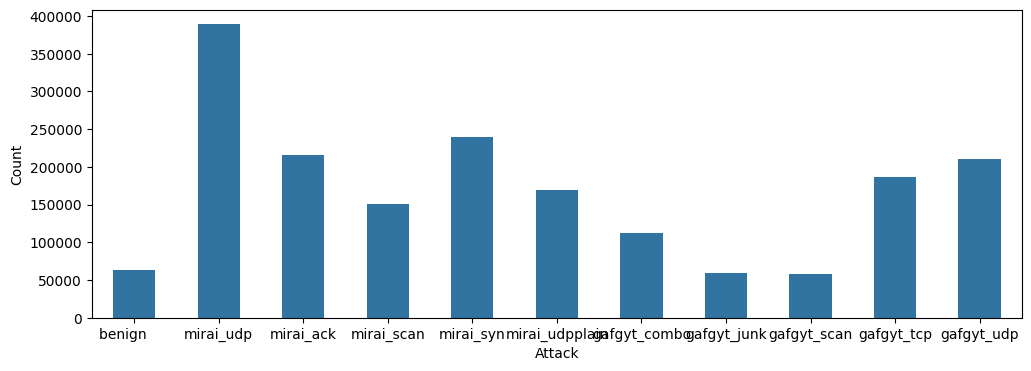

In [ ]:
plt.figure(figsize=(12, 4))  # Adjust the width and height
sns.countplot(x = df["Attack_Class"],width=0.5,)
plt.xlabel('Attack')
plt.ylabel('Count')
plt.show()

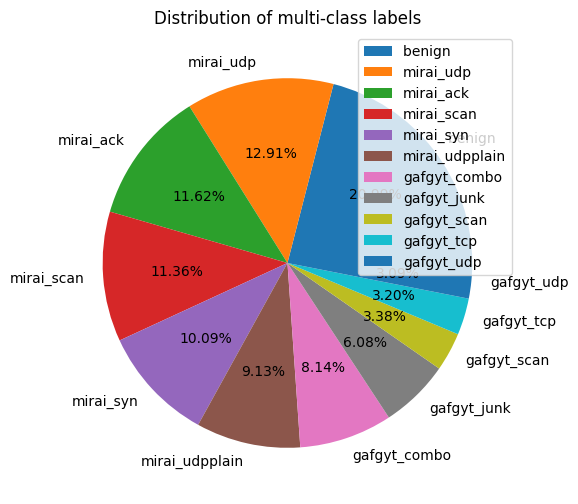

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Attack_Class'].value_counts(),autopct='%0.2f%%',labels=df.Attack_Class.unique())
plt.title('Distribution of multi-class labels')
plt.legend()
plt.show()

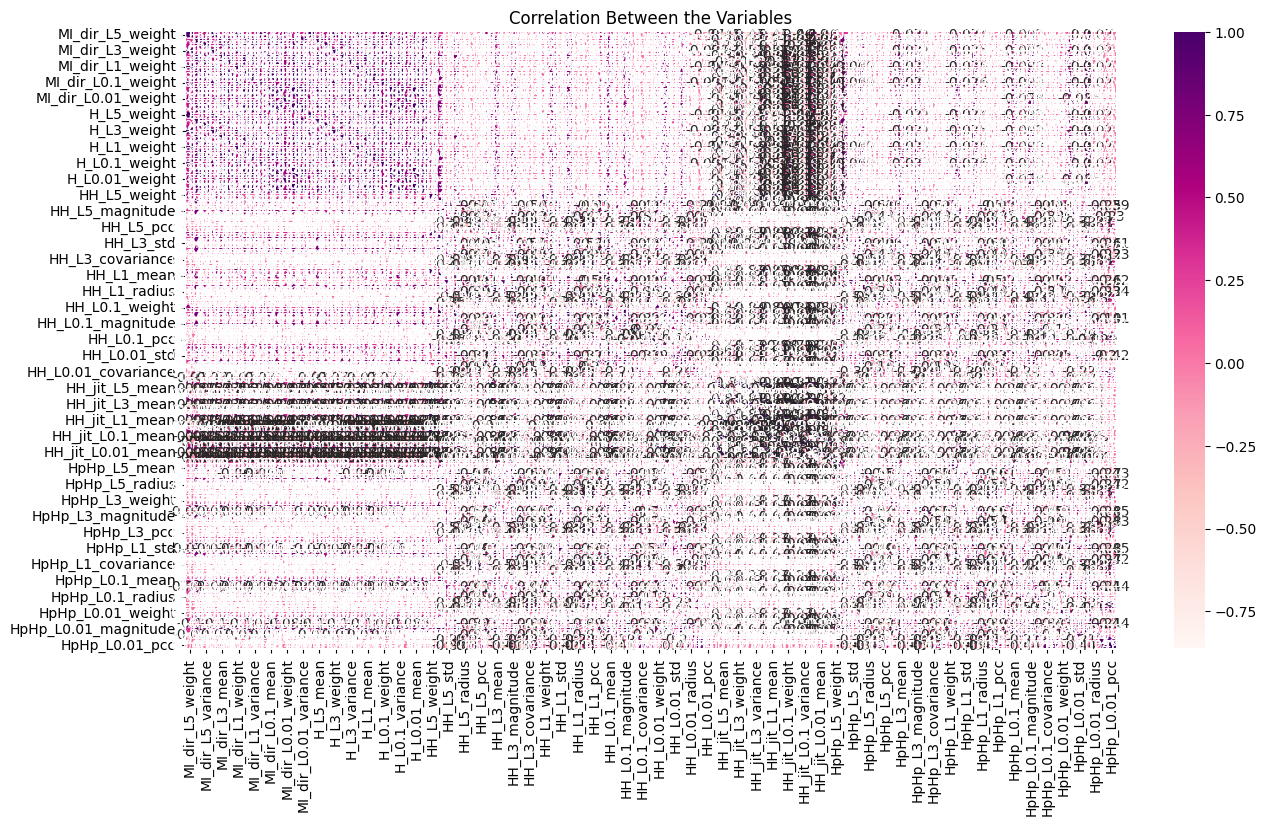

In [ ]:
numeric_data = df.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

In [ ]:
def distribution(df, col, num_bins, i):
    plt.hist(df[col], num_bins, edgecolor='black')
    plt.title('Distribution of '+ col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    print(i)
    plt.show()

In [ ]:
cols = df.columns
i = 1
#for col in cols[:-2]:
 #   distribution(df, col, 20, i)
  #  i = i+1

## **Data Preprocessing**

In [13]:
print(df.duplicated().sum(), "fully duplicate rows to remove")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

322367 fully duplicate rows to remove


(1531807, 116)

In [14]:
class_counts = df["Attack_Class"].value_counts()
total_samples = class_counts.sum()
# Display the classes along with the number of samples
print("Serial\tAttack_Class\t\tNumber of Samples")
print("-----------------------------------")
serial_number = 1
for class_name, count in class_counts.items():
    print(f"{serial_number}\t{class_name}\t\t{count}")
    serial_number += 1
print("-----------------------------------")
print(f"Total Samples:                  {total_samples}")

Serial	Attack_Class		Number of Samples
-----------------------------------
1	mirai_udp		389146
2	mirai_syn		239380
3	mirai_ack		215480
4	mirai_udpplain		169350
5	mirai_scan		150877
6	gafgyt_udp		105807
7	gafgyt_tcp		87877
8	gafgyt_combo		59718
9	benign     		53506
10	gafgyt_junk		30816
11	gafgyt_scan		29850
-----------------------------------
Total Samples:                  1531807


In [15]:
label_columns = "Attack_Class"
feature_columns = list(df.columns)
feature_columns.remove(label_columns)
X = df[feature_columns]
y = df[label_columns]

In [16]:
cls_label_encoder = LabelEncoder()
y = cls_label_encoder.fit_transform(y)
unique_values = cls_label_encoder.classes_
print("Unique encoded values:", unique_values)

Unique encoded values: ['benign     ' 'gafgyt_combo' 'gafgyt_junk' 'gafgyt_scan' 'gafgyt_tcp'
 'gafgyt_udp' 'mirai_ack' 'mirai_scan' 'mirai_syn' 'mirai_udp'
 'mirai_udpplain']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,stratify=y)

Min-Max Scaling (Normalization)

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
n_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [22]:
input_shape = X_train.shape[1:]
print(input_shape)

(115, 1)


In [23]:
# Sample 50% of the dataset
sample_size = int(0.5 * len(X_train))  # 50% sample

# Generate random indices
indices = np.random.choice(len(X_train), size=sample_size, replace=False)

# Use the sampled indices to get a subset of your data
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

## **CNN**

In [34]:
input_1 = Input(X_train_sampled.shape[1:], name='Inputlayer')

x = Conv1D(64, kernel_size=3, padding='same')(input_1)
x = MaxPool1D(3, strides=2, padding='same')(x)

x = Conv1D(128, 3, strides=2, padding='same')(x)
x = Conv1D(128, 3, strides=2, padding='same')(x)
x = MaxPooling1D(3, strides=2, padding='same')(x)
x = Conv1D(128, 3, strides=2, padding='same')(x)
x = Conv1D(128, 3, strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(11, activation='softmax')(x)

model_cnn = Model(inputs=input_1, outputs=output_layer)
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Inputlayer (InputLayer)              │ (None, 115, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 115, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 58, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 29, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 15, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 4, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 2, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,395 (845.29 KB)

 Trainable params: 216,395 (845.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
callbacks = [EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1,
    )
]

In [38]:
history = model_cnn.fit(X_train_sampled, y_train_sampled, 
                        epochs=10, 
                        batch_size=512, 
                        validation_data=(X_test, y_test), 
                        callbacks=callbacks, 
                        verbose=1)

Epoch 1/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - accuracy: 0.6528 - loss: 0.1484 - val_accuracy: 0.8994 - val_loss: 0.0363
Epoch 2/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9009 - loss: 0.0344 - val_accuracy: 0.9173 - val_loss: 0.0282
Epoch 3/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9174 - loss: 0.0271 - val_accuracy: 0.9243 - val_loss: 0.0255
Epoch 4/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 62s 52ms/step - accuracy: 0.9215 - loss: 0.0251 - val_accuracy: 0.9330 - val_loss: 0.0229
Epoch 5/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9324 - loss: 0.0212 - val_accuracy: 0.9388 - val_loss: 0.0187
Epoch 6/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9309 - loss: 0.0231 - val_accuracy: 0.9382 - val_loss: 0.0185
Epoch 7/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 64s 54ms/step - accuracy: 0.9348 - loss: 0.0195 - val_accuracy: 0.9331 - val_loss: 0.0251
Epoch 8/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 63s 53ms/step - accuracy: 0.9370 -

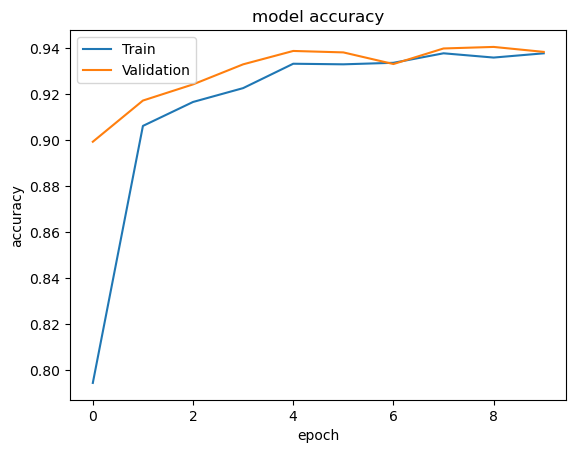

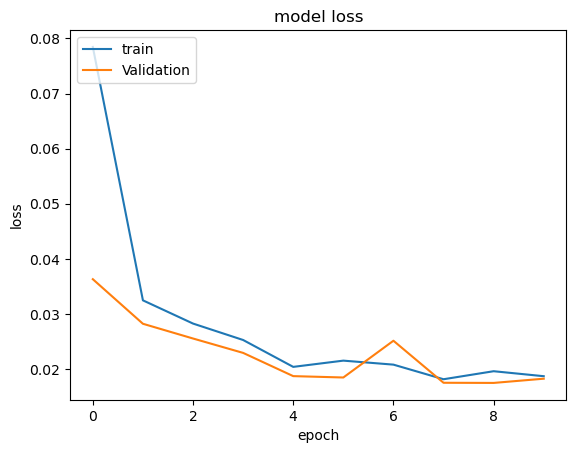

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss'])
plt.plot(history.history['val_loss'])
plt.title( 'model loss')
plt.ylabel( 'loss' )
plt.xlabel( 'epoch')
plt.legend(['train' , 'Validation' ], loc= 'upper left' )
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Calculate metrics
cnn_accuracy = accuracy_score(y_test_classes, y_pred_classes)
cnn_precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
cnn_recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
cnn_f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Display results
print(f"Accuracy: {cnn_accuracy:.2f}")
print(f"Precision: {cnn_precision:.2f}")
print(f"Recall: {cnn_recall:.2f}")
print(f"F1-score: {cnn_f1:.2f}")

9574/9574 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1-score: 0.92


In [88]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

In [98]:
# Sample 50% of the dataset
sample_size = int(0.5 * len(X_train))  
indices = np.random.choice(len(X_train), size=sample_size, replace=False)

# Use the sampled indices to create a subset of data
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
y_train_sampled = to_categorical(y_train_sampled, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)

# Reshape X_train_sampled and X_test to 3D (samples, timesteps, features)
if len(X_train_sampled.shape) == 2:  # If it's 2D, reshape to 3D
    X_train_sampled = X_train_sampled.reshape((X_train_sampled.shape[0], X_train_sampled.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM Model Definition
input_layer = Input(shape=(X_train_sampled.shape[1], X_train_sampled.shape[2]), name="InputLayer")

x = LSTM(64, return_sequences=True, name="LSTM_Layer_1")(input_layer)
x = Dropout(0.2, name="Dropout_1")(x)

x = LSTM(128, return_sequences=False, name="LSTM_Layer_2")(x)
x = Dropout(0.2, name="Dropout_2")(x)

x = Dense(128, activation='relu', name="Dense_1")(x)
x = Dropout(0.2, name="Dropout_3")(x)

x = Dense(64, activation='relu', name="Dense_2")(x)
output_layer = Dense(11, activation='softmax', name="OutputLayer")(x)

model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

model_lstm.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 115, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_Layer_1 (LSTM)                  │ (None, 115, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_1 (Dropout)                  │ (None, 115, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_Layer_2 (LSTM)                  │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,195 (551.54 KB)

 Trainable params: 141,195 (551.54 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=10,
        verbose=1,
        restore_best_weights=True
    )
]

In [ ]:
history = model_lstm.fit(
    X_train_sampled, y_train_sampled,  # Inputs and one-hot encoded targets
    epochs=10,
    batch_size=512,
    validation_data=(X_test, y_test),  # Validation set
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 628s 519ms/step - accuracy: 0.5274 - loss: 1.1797 - val_accuracy: 0.7112 - val_loss: 0.6025
Epoch 2/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 590s 493ms/step - accuracy: 0.7075 - loss: 0.6313 - val_accuracy: 0.6261 - val_loss: 0.8285
Epoch 3/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 590s 493ms/step - accuracy: 0.6367 - loss: 0.8220 - val_accuracy: 0.6101 - val_loss: 0.9183
Epoch 4/10
 536/1197 ━━━━━━━━━━━━━━━━━━━━ 4:35 416ms/step - accuracy: 0.6461 - loss: 0.7849

## ***Random Forest training ***

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [60]:
# Reshape X_train to 2 dimensions
X_train = X_train.reshape(X_train.shape[0], -1)

# Sample 50% of the dataset (you can adjust the percentage as needed)
sample_size = int(0.5 * len(X_train))  # 50% sample

# Generate random indices
indices = np.random.choice(len(X_train), size=sample_size, replace=False)

# Use the sampled indices to get a subset of your data
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

# Train Random Forest model on the sampled data
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(random_state=42)

In [64]:
# Reshape X_test to 2 dimensions
X_test = X_test.reshape(X_test.shape[0], -1)

# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate and print metrics
rf_acc_score = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print(f"Accuracy: {rf_acc_score:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")

Accuracy: 0.94
Precision: 0.97
Recall: 0.94
F1-score: 0.92


## **SVC**

## **Naive Bayes model**

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import joblib

# Flatten X_train and X_test if necessary
if len(X_train.shape) > 2:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

# Convert one-hot encoded y_train and y_test to 1D arrays
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Sample 50% of the dataset
sample_size = int(0.5 * len(X_train))  # Adjust sampling percentage as needed
indices = np.random.choice(len(X_train), size=sample_size, replace=False)

# Use the sampled indices to create a subset of data
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

# Train the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred = model_nb.predict(X_test)


In [86]:
# Reshape X_test to 2 dimensions if necessary
if len(X_test.shape) > 2:
    X_test = X_test.reshape(X_test.shape[0], -1)

# Predict on the test set using the Naive Bayes model
y_pred = model_nb.predict(X_test)

# Calculate and print metrics
nb_acc_score = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print("Naive Bayes Evaluation:")
print(f"Accuracy: {nb_acc_score:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-score: {nb_f1:.2f}")


Naive Bayes Evaluation:
Accuracy: 0.69
Precision: 0.64
Recall: 0.69
F1-score: 0.64
